In [1]:
%load_ext autoreload
%autoreload 2

sklearn version: 1.4.2
Ground truth labels provided. Computing ground truth-based clustering metrics along with non-ground truth based metrics.
Ground truth labels provided. Computing ground truth-based clustering metrics along with non-ground truth based metrics.
Search space:
[[KMeans(),
  {'algorithm': ['lloyd', 'elkan'],
   'init': ['k-means++', 'random'],
   'max_iter': [50, 100, 200],
   'n_clusters': range(3, 21),
   'tol': [0.01, 0.0001, 1e-06, 1e-08]}],
 [AgglomerativeClustering(),
  {'linkage': ['ward', 'complete', 'average', 'single'],
   'metric': ['euclidean', 'manhattan', 'cosine', 'l1', 'l2'],
   'n_clusters': range(3, 21)}],
 [HDBSCAN(),
  {'allow_single_cluster': [True, False],
   'cluster_selection_method': ['eom', 'leaf'],
   'min_cluster_size': range(1, 21)}],
 [MeanShift(),
  {'bin_seeding': [True, False],
   'max_iter': [100, 300, 500],
   'min_bin_freq': [1, 5, 10]}]]



  0%|          | 0/4 [00:00<?, ?it/s]

Searching for best hyperparameters for KMeans...
Available parameters: ['algorithm', 'copy_x', 'init', 'max_iter', 'n_clusters', 'n_init', 'random_state', 'tol', 'verbose']
But only searching for parameters: ['n_clusters', 'algorithm', 'init', 'max_iter', 'tol']


Plotting silhouette analysis...
Plotting first 2 features of the data...
Saving silhouette plot for k=5 at results/models/KMeans/silhouette_plots/5_silhouette_plot.png


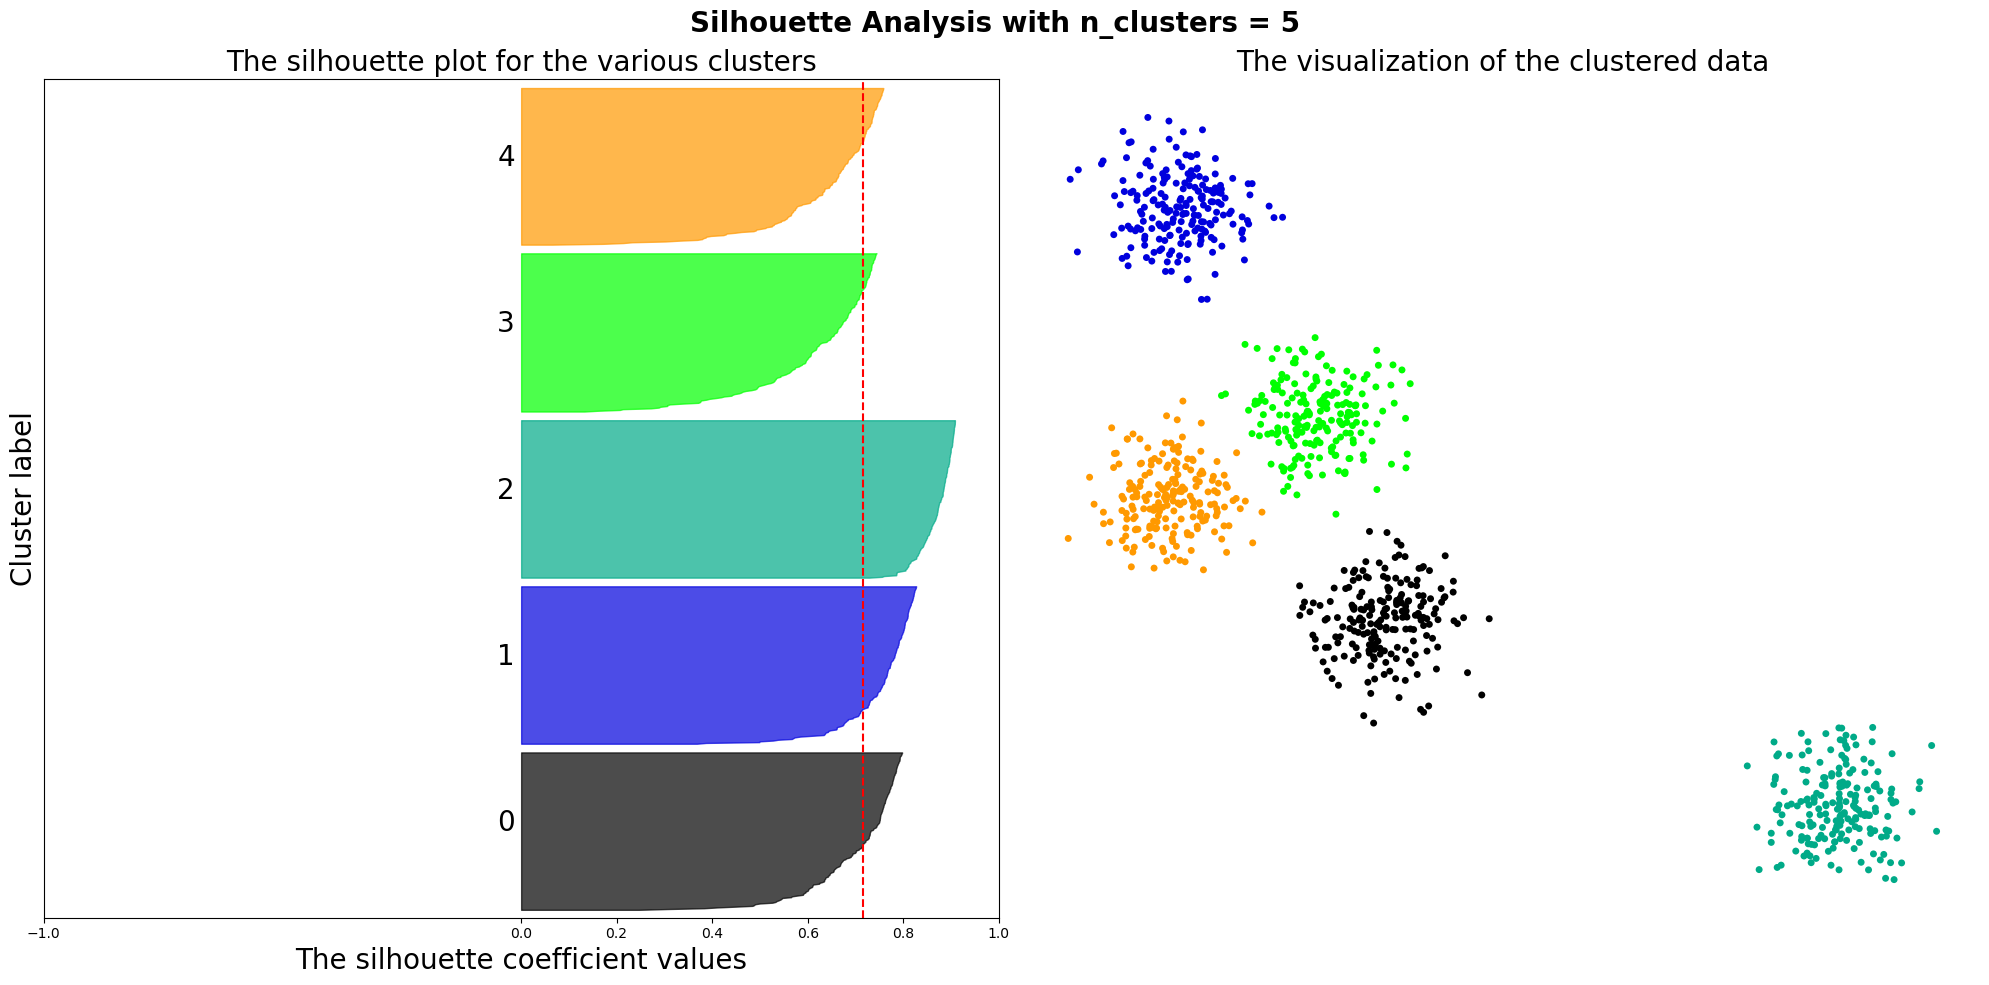

 25%|██▌       | 1/4 [00:38<01:56, 38.92s/it]


Searching for best hyperparameters for AgglomerativeClustering...
Available parameters: ['compute_distances', 'compute_full_tree', 'connectivity', 'distance_threshold', 'linkage', 'memory', 'metric', 'n_clusters']
But only searching for parameters: ['n_clusters', 'metric', 'linkage']


Plotting silhouette analysis...
Plotting first 2 features of the data...
Saving silhouette plot for k=5 at results/models/AgglomerativeClustering/silhouette_plots/5_silhouette_plot.png


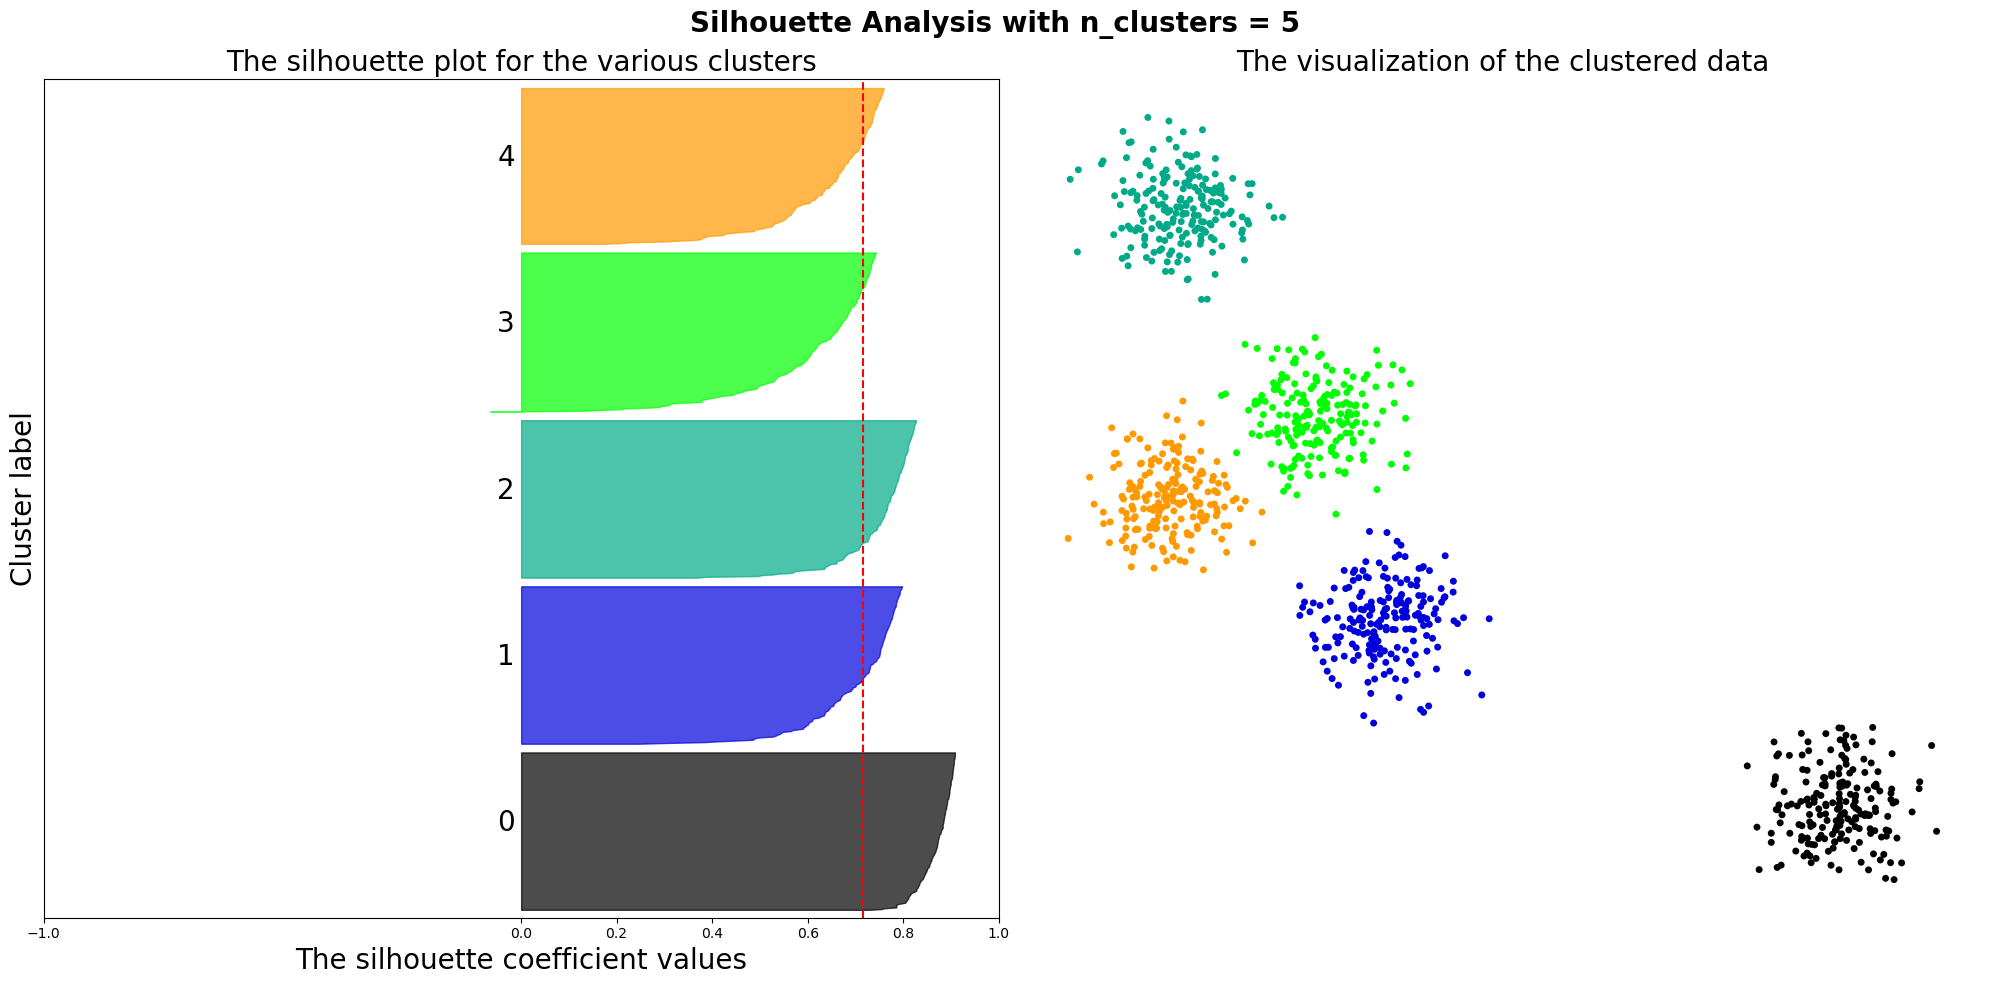

 50%|█████     | 2/4 [00:51<00:47, 23.60s/it]


Searching for best hyperparameters for HDBSCAN...
Available parameters: ['algorithm', 'allow_single_cluster', 'alpha', 'cluster_selection_epsilon', 'cluster_selection_method', 'copy', 'leaf_size', 'max_cluster_size', 'metric', 'metric_params', 'min_cluster_size', 'min_samples', 'n_jobs', 'store_centers']
But only searching for parameters: ['min_cluster_size', 'cluster_selection_method', 'allow_single_cluster']


Plotting silhouette analysis...
Plotting first 2 features of the data...
Saving silhouette plot for k=6 at results/models/HDBSCAN/silhouette_plots/6_silhouette_plot.png


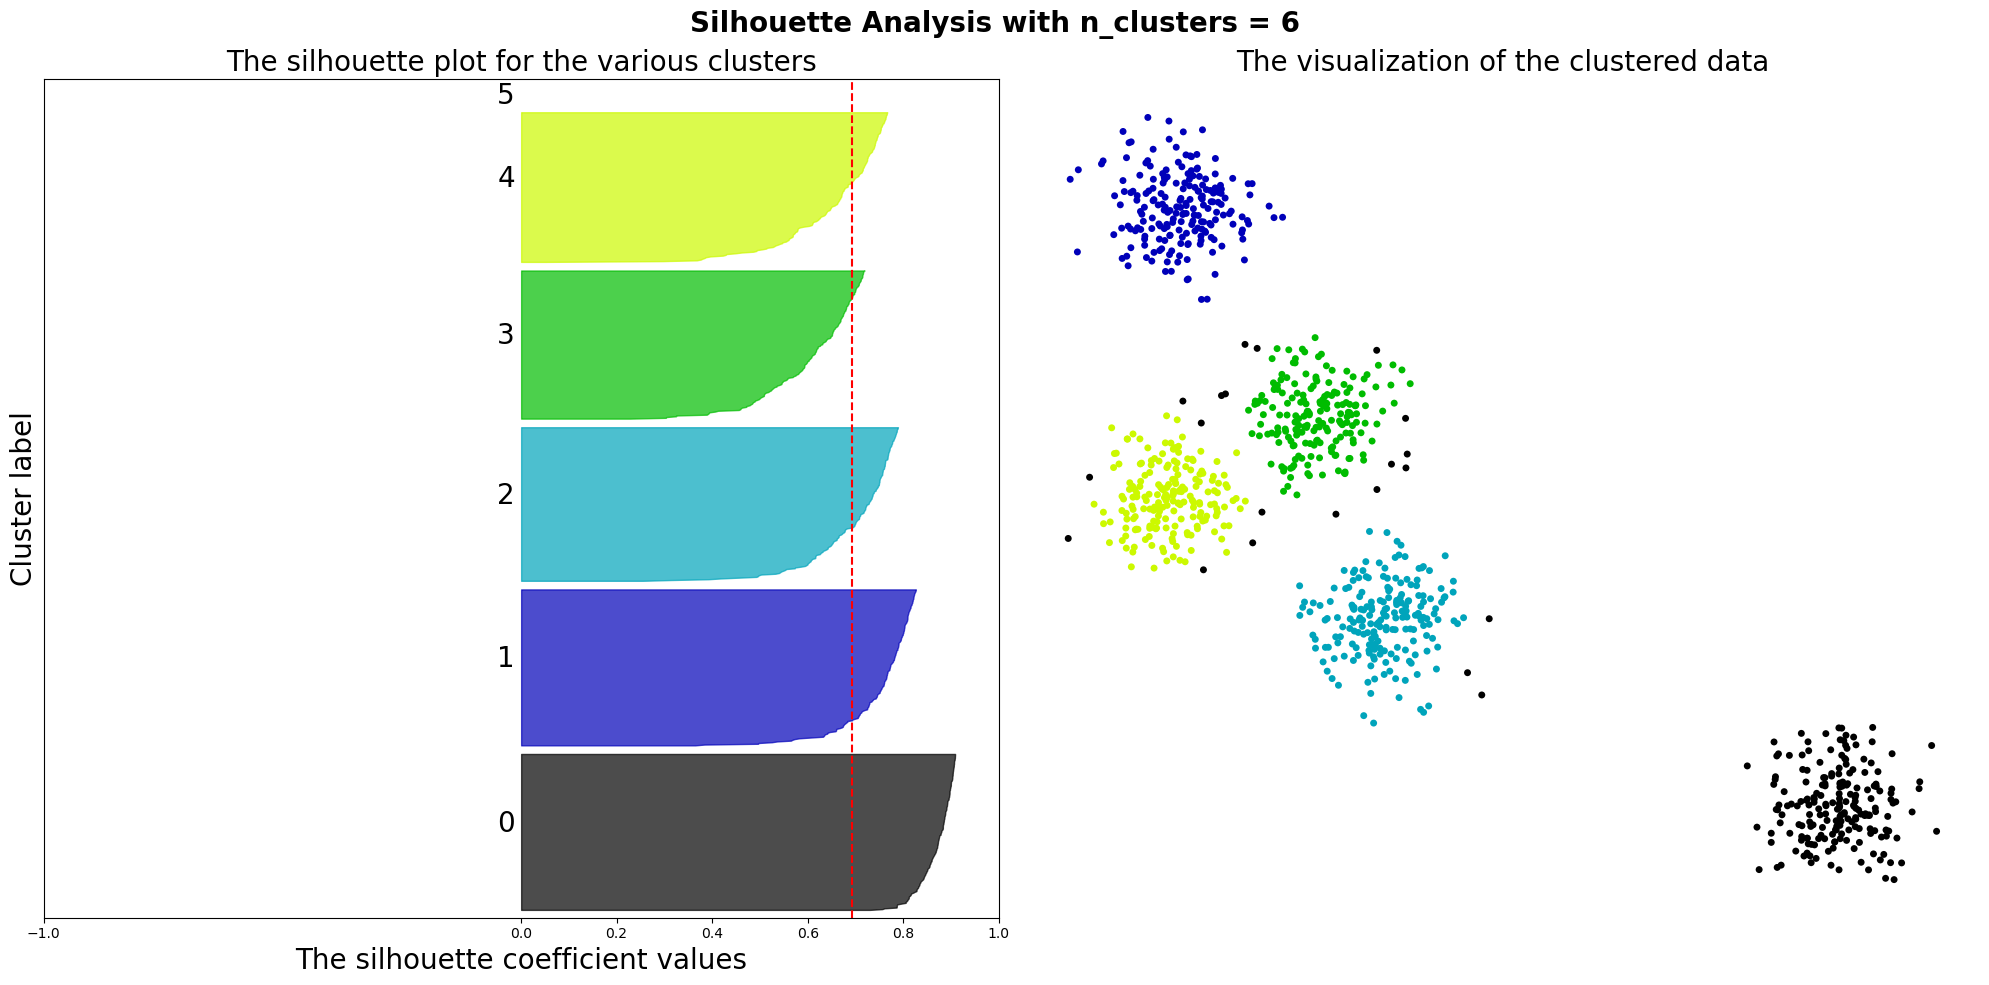

 75%|███████▌  | 3/4 [00:57<00:15, 15.51s/it]


Searching for best hyperparameters for MeanShift...
Available parameters: ['bandwidth', 'bin_seeding', 'cluster_all', 'max_iter', 'min_bin_freq', 'n_jobs', 'seeds']
But only searching for parameters: ['max_iter', 'bin_seeding', 'min_bin_freq']


Plotting silhouette analysis...
Plotting first 2 features of the data...
Saving silhouette plot for k=2 at results/models/MeanShift/silhouette_plots/2_silhouette_plot.png


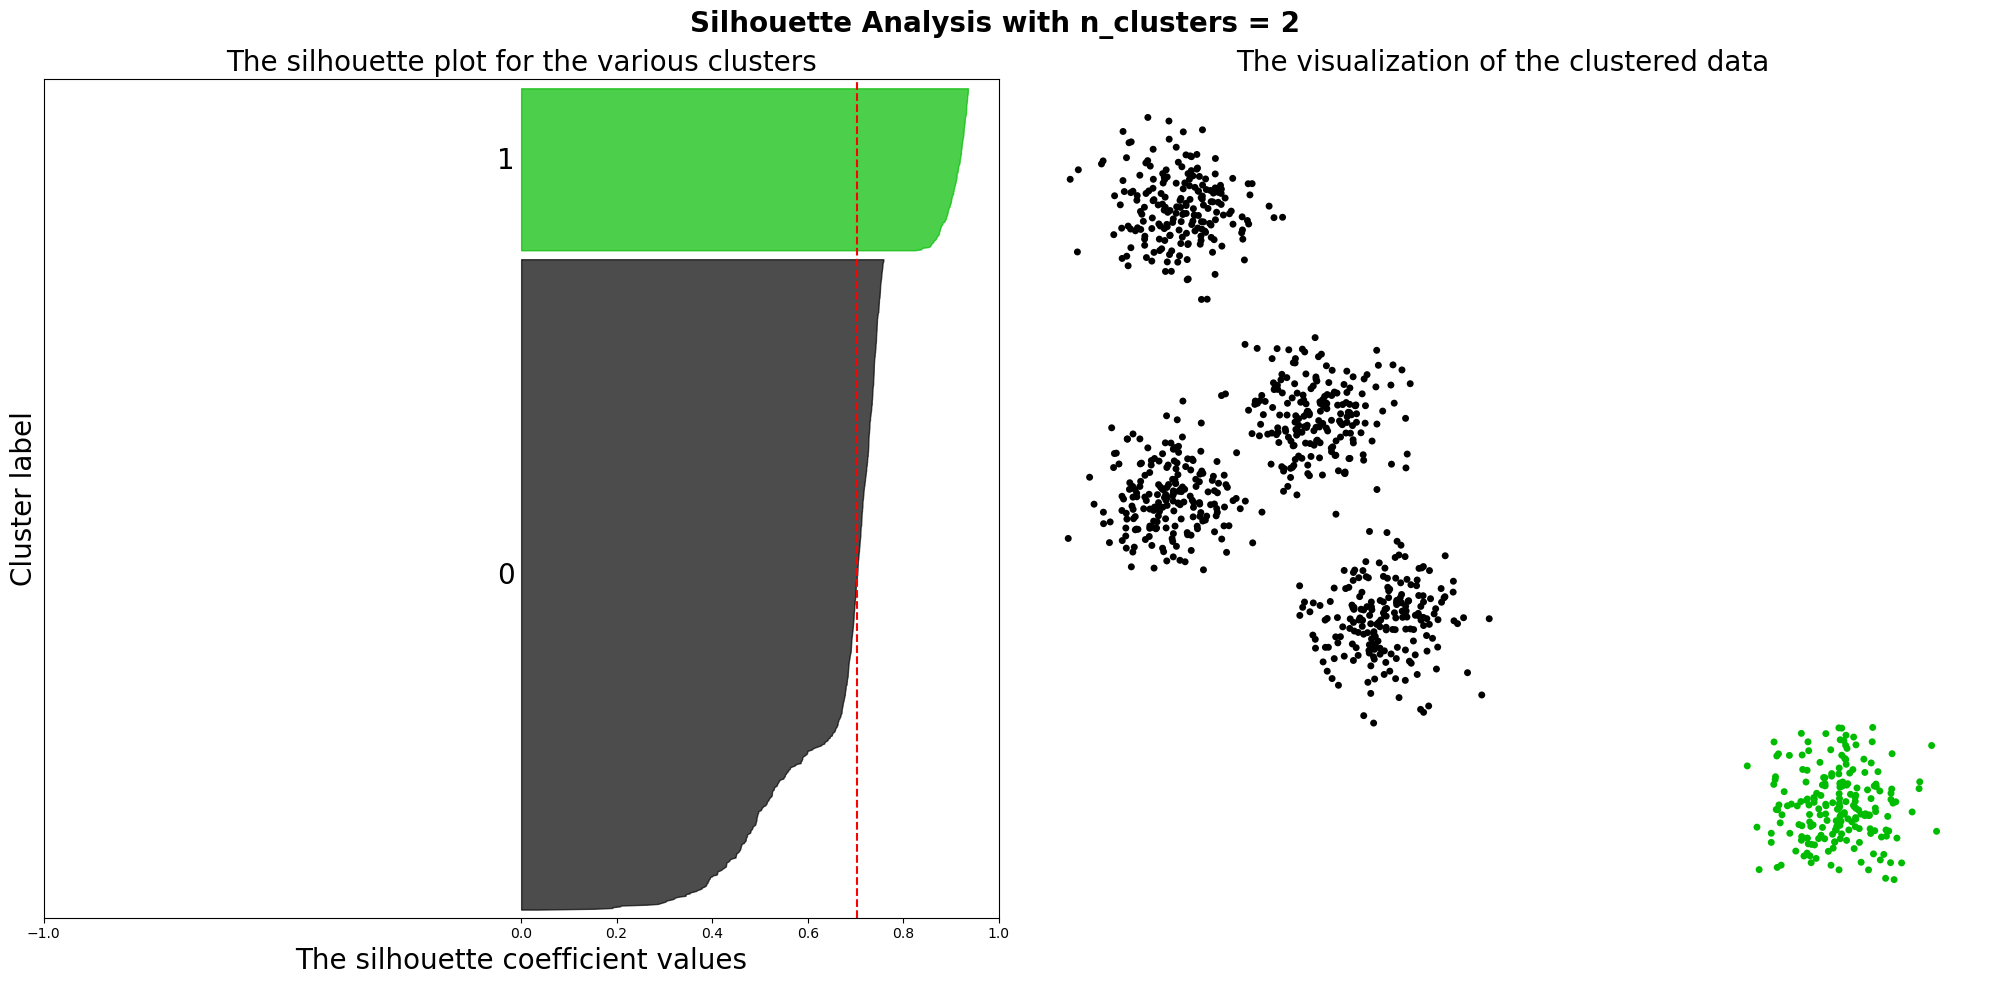

100%|██████████| 4/4 [01:35<00:00, 23.90s/it]


Best model:  KMeans
Best model params:  {'algorithm': 'lloyd', 'copy_x': True, 'init': 'k-means++', 'max_iter': 50, 'n_clusters': 5, 'n_init': 'auto', 'random_state': None, 'tol': 0.01, 'verbose': 0}


In [2]:
import os
import numpy as np
from sklearn.datasets import make_blobs, load_iris, load_digits
from eval_clustering import eval_clustering

## For testing purposes
rng = np.random.RandomState(0)
n_samples=1000

### Synthetic data: Without outliers
X, y = make_blobs(n_samples=n_samples, centers=5, n_features=2, cluster_std=0.60, random_state=rng)

# ### Synthetic data: With outliers
# centers = [[1, 1], [-1, -1], [1, -1]]
# #### Generate some blobs
# X, y = make_blobs(
#     n_samples=n_samples, centers=centers, cluster_std=0.4, random_state=rng
# )
# #### Change the first 1% entries to outliers
# for f in range(int(n_samples / 100)):
#     X[f] = [10, 3] + rng.normal(size=2) * 0.1
# #### Shuffle the data so that we don't know where the outlier is.
# X = shuffle(X, random_state=rng)

### Real benchmark
# data = load_iris()
# X, y = data.data, data.target

save_dir = "results"
os.makedirs(save_dir, exist_ok=True)

best_model, grid_search_results = eval_clustering(
                                       X=X,                                               # dataset to cluster
                                       gt_labels=y,                                       # ground-truth labels; often these aren't available so don't pass this argument
                                       num_runs=10,                                       # number of times to fit a model
                                       best_model_metric="Calinski-Harabasz",             # metric to use to choose the best model
                                       make_silhoutte_plots=True, embed_data_in_2d=False, # whether to make silhouette plots
                                       show=True,                                         # whether to display the plots; this is used in a notebook
                                       save=True, save_dir="results"                      # whether to save the plots
                                    )
print("Best model: ", best_model.__class__.__name__)
print("Best model params: ", best_model.get_params())

In [3]:
grid_search_results.keys()

dict_keys(['KMeans', 'AgglomerativeClustering', 'HDBSCAN', 'MeanShift'])

In [4]:
grid_search_results['KMeans'].head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       0.279661      0.086114         0.030522        0.008047   
1       0.283709      0.089685         0.036585        0.023264   
2       0.267650      0.082615         0.031566        0.008296   
3       0.045300      0.086914         0.029639        0.016354   
4       0.003032      0.003608         0.024920        0.007262   

  param_algorithm param_init param_max_iter param_n_clusters param_tol  \
0           lloyd  k-means++             50                3      0.01   
1           lloyd  k-means++             50                3    0.0001   
2           lloyd  k-means++             50                3  0.000001   
3           lloyd  k-means++             50                3       0.0   
4           lloyd  k-means++             50                4      0.01   

                                              params  ...  split3_test_FMI  \
0  {'algorithm': 'lloyd', 'init': 'k-means++', 'm...  ...         0.670396   
1  {'algorithm': 'lloyd', 'init': 'k-means++', 'm...  ...         0.671817   
2  {'algorithm': 'lloyd', 'init': 'k-means++', 'm...  ...         0.671817   
3  {'algorithm': 'lloyd', 'init': 'k-means++', 'm...  ...         0.671817   
4  {'algorithm': 'lloyd', 'init': 'k-means++', 'm...  ...         0.844548   

   split4_test_FMI  split5_test_FMI  split6_test_FMI  split7_test_FMI  \
0         0.664735         0.663995         0.670396         0.661942   
1         0.671817         0.616222         0.671817         0.671817   
2         0.661297         0.671817         0.671817         0.671817   
3         0.671817         0.671817         0.671817         0.671817   
4         0.842383         0.842383         0.844548         0.799806   

   split8_test_FMI  split9_test_FMI  mean_test_FMI  std_test_FMI  \
0         0.597901         0.671102       0.661307      0.021390   
1         0.671817         0.671817       0.664283      0.016487   
2         0.661297         0.671817       0.669713      0.004208   
3         0.659842         0.671817       0.670620      0.003592   
4         0.804339         0.842383       0.829824      0.020305   

   rank_test_FMI  
0            483  
1            477  
2            458  
3            451  
4            240  

[5 rows x 166 columns]